In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
raw_data = pd.read_csv(r"C:\Users\user\Desktop\MAL Anime Top 10000 Details.csv.zip")
new_data = pd.DataFrame(raw_data[["Anime Title","Type","Episodes","Aired","Producers","Studios",
                                  "Source","Genres","Score","Members","Favorites"]])
TV_data = new_data.loc[new_data["Type"]=="TV"]
Movie_data = new_data.loc[new_data["Type"]=="Movie"]
TV_data_manga = pd.read_csv(r"C:\Users\user\Downloads\TV_data_manga.txt")

In [9]:
source = TV_data['Source']
genres = TV_data['Genres']
score = TV_data['Score']
members = pd.DataFrame(TV_data['Members'])
fav = TV_data['Favorites']
studios = TV_data['Studios']

In [10]:
TV_data.insert(loc=11, column='Fav%', value=round(TV_data['Favorites']*100/TV_data['Members'], 3))

In [11]:
source_list = source.tolist() #list of sources based on index in Tv_data
source_list_unique = ["Manga", "Novel", "Game", "Other", "Audio", "Original"] #compresed source_reference list

In [12]:
a = [0] * len(TV_data)
for i in range(len(source_list)):
    if source_list[i] in ["Manga", "Web manga", "4-koma manga", "Digital manga", "Picture book"]:
        a[i] = source_list_unique.index("Manga")
    elif source_list[i] in ["Visual novel", "Light novel", "Book"]:
        a[i] = source_list_unique.index("Novel")
    elif source_list[i] in ["Card game", "Game", "Visual novel"]:
        a[i] = source_list_unique.index("Game")
    elif source_list[i] in ["Other", "Unknown"]:
        a[i] = source_list_unique.index("Other")
    elif source_list[i] in ["Radio", "Music"]:
        a[i] = source_list_unique.index("Audio")
    elif source_list[i] == "Original":
        a[i] = source_list_unique.index("Original")
TV_data["Source_reference"] = a

<ipython-input-12-1c5062921d02>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  TV_data["Source_reference"] = a


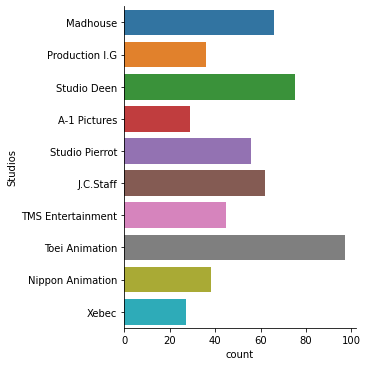

In [5]:
sb.catplot(y = 'Studios', data = TV_data[TV_data.groupby('Studios').Studios.transform('count') > 25], kind='count')

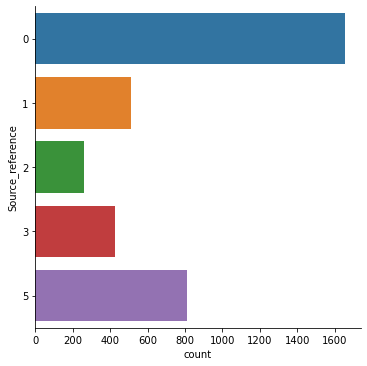

In [13]:
sb.catplot(y = 'Source_reference', data = TV_data[TV_data.groupby('Source_reference').Studios.transform('count') > 25], kind='count')

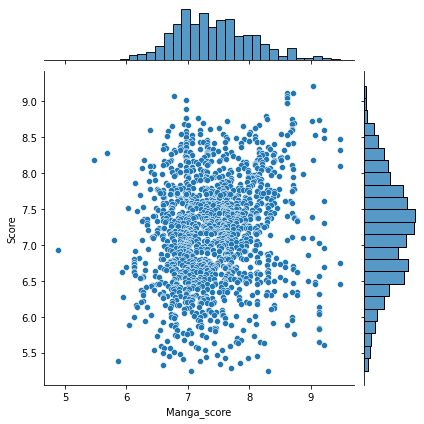

In [7]:
sb.jointplot(y = 'Score', x = 'Manga_score', data = TV_data_manga)